Shapefile CRS: EPSG:3857


<Axes: >

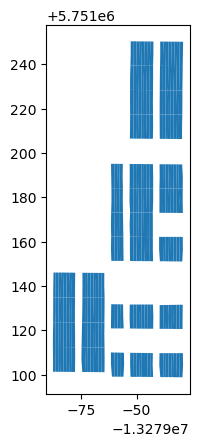

In [1]:
# Load the shape file and check its CRS (they should be same)

import geopandas as gpd

# path to your shapefile
shapefile_path = 'C:/Users/say70/Desktop/NX/2021/6_14/shapefiles/polygons.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Check the CRS after reprojection
print("Shapefile CRS:", gdf.crs)

# if you want to read any specific coloumn within shape file

gdf[['plot_id','geometry']]

#example of reading shape file head

gdf.head()

gdf['geometry']
gdf.head(240)['geometry'].plot()

Original CRS: EPSG:3857
Reprojected CRS: EPSG:4326


,location,nit_perc,variety,border,rep,plot_id,geometry
0,1,200,Nork,1,5,1_200_Nork_1_5,"POLYGON ((-119.28776 45.81812, -119.28775 45.8..."
1,2,200,Nork,0,5,2_200_Nork_0_5,"POLYGON ((-119.28775 45.81812, -119.28774 45.8..."
2,3,200,Nork,0,5,3_200_Nork_0_5,"POLYGON ((-119.28774 45.81812, -119.28773 45.8..."
3,4,200,Nork,1,5,4_200_Nork_1_5,"POLYGON ((-119.28773 45.81812, -119.28771 45.8..."
4,5,50,Nork,1,5,5_50_Nork_1_5,"POLYGON ((-119.28771 45.81812, -119.28770 45.8..."
...,...,...,...,...,...,...,...
203,284,470,New,1,4,284_470_New_1_4,"POLYGON ((-119.28761 45.81724, -119.28760 45.8..."
204,285,360,New,1,4,285_360_New_1_4,"POLYGON ((-119.28760 45.81724, -119.28759 45.8..."
205,286,360,New,0,4,286_360_New_0_4,"POLYGON ((-119.28759 45.81724, -119.28757 45.8..."
206,287,360,New,0,4,287_360_New_0_4,"POLYGON ((-119.28757 45.81724, -119.28756 45.8..."


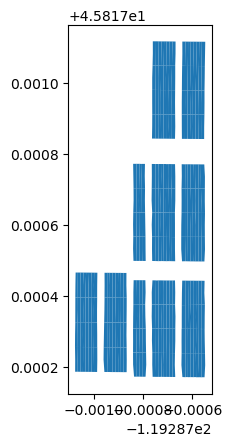

In [2]:
import geopandas as gpd

# Path to your shapefile
shapefile_path = 'C:/Users/say70/Desktop/NX/2021/6_14/shapefiles/polygons.shp'

# Read the shapefile
gdf = gpd.read_file(shapefile_path)

# Print the current CRS
print("Original CRS:", gdf.crs)

# Define the CRS you want to reproject to, for example, EPSG:4326 (WGS84)
target_crs = 'EPSG:4326'

# Reproject the GeoDataFrame to the target CRS
gdf_reprojected = gdf.to_crs(target_crs)

# Print the CRS after reprojection
print("Reprojected CRS:", gdf_reprojected.crs)
# if you want to read any specific coloumn within shape file

gdf_reprojected [['plot_id','geometry']]

#example of reading shape file head

gdf_reprojected .head()


gdf_reprojected.head(288)['geometry'].plot()

# test for arranging shape file based on the locations (you can change according to requirements)

gdf_reprojected.sort_values(by='location', ascending=True)


# # Save the attributes to an Excel sheet
# excel_output_path = 'C:/Users/say70/Desktop/NX/2021/6_14/shapefiles/polygons_attributes1.xlsx'
# gdf_reprojected.to_excel(excel_output_path, index=False)
# print("Shapefile attributes exported to Excel successfully.")

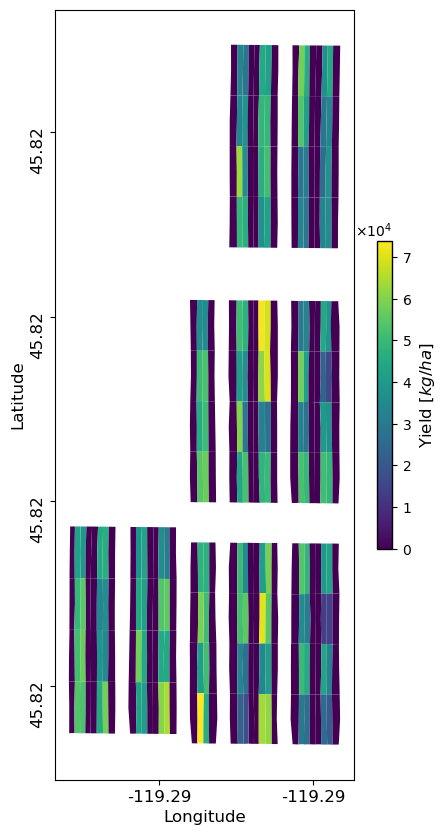

In [6]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Add this line to import pandas
from matplotlib.ticker import MaxNLocator, ScalarFormatter, FuncFormatter
# Path to your Excel file
excel_file_path = r'C:/Users/Say70/Desktop/NX/2021/shape2021att.xlsx'

# Read the Excel file and specify the sheet name you want to read
sheet_name = 'Sheet1'
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

Y = df['Y'].values

# Sort the GeoDataFrame based on the 'location' column
gdf_reprojected = gdf_reprojected.sort_values(by='location', ascending=True)

# Assign the 'Y' values to a new column named 'Yield'
gdf_reprojected['Yield'] = Y


# Print the first few rows of the GeoDataFrame to verify the sorting and assignment
#print(gdf_reprojected.head())

# Plot the variation of 'Y' values within polygons
fig, ax = plt.subplots(figsize=(5, 10))  # Adjust the size as needed
plot= gdf_reprojected.plot(column='Yield', cmap='viridis', ax=ax)

# Shrink the color bar
colorbar=plot.get_figure().colorbar(plot.collections[0], ax=ax, shrink=0.4, pad=0.06)
colorbar.outline.set_linewidth(1)
colorbar.set_label('Yield [$kg/ha$]', fontsize=12)
# Format color bar labels in scientific notation (powers of 10)
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-2, 2))  # Adjust the range for scientific notation
colorbar.ax.yaxis.set_major_formatter(formatter)
# Function to format latitude and longitude labels
def fmt(x, pos):
    return f'{x:.2f}'

# Apply the formatter to the latitude and longitude axes
ax.xaxis.set_major_formatter(FuncFormatter(fmt))
ax.yaxis.set_major_formatter(FuncFormatter(fmt))

# Reduce the number of latitude and longitude ticks
ax.xaxis.set_major_locator(MaxNLocator(nbins=2))  # Adjust `nbins` to control the number of ticks on x-axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust `nbins` to control the number of ticks on y-axis

# Set axis labels and title
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', rotation='vertical', fontsize=12) 
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust the fontsize as needed
ax.tick_params(axis='y', rotation=90)  # Rotate y-axis tick labels vertically

plt.savefig(r'C:\Users\Say70\OneDrive - Mississippi State University\Desktop\Yield monitoring_new\yield_21.png', dpi=500) 


# Show the plot
plt.show()

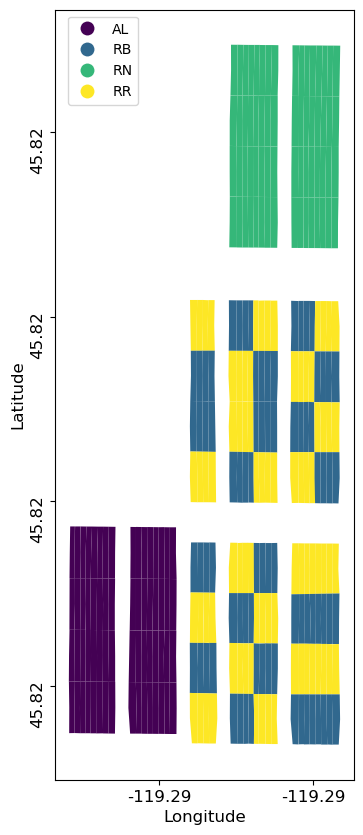

In [7]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Path to your Excel file
excel_file_path = r'C:/Users/say70/Desktop/NX/2021/6_14/shapefiles/polygons_attributes.xlsx'

# Read the Excel file and specify the sheet name you want to read
sheet_name = 'Sheet1'
df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

# Sort the GeoDataFrame based on the 'location' column
gdf_reprojected = gdf_reprojected.sort_values(by='location', ascending=True)
gdf_reprojected['variety'] = df['variety']



# Plot the variation of 'Y' values within polygons for each variety
fig, ax = plt.subplots(figsize=(5, 10))  # Adjust the size as needed

gdf_reprojected.plot(column='variety', cmap='viridis', legend=True, ax=ax)
# Customize the legend location and size
legend = ax.get_legend()  # Get the legend
legend.set_bbox_to_anchor((0.3, 1))  # Adjust the legend location
legend.get_title().set_fontsize(18) 

# Set axis labels and title
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', rotation='vertical', fontsize=12) 
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust the fontsize as needed
ax.tick_params(axis='y', rotation=90)
# Function to format latitude and longitude labels
def fmt(x, pos):
    return f'{x:.2f}'

# Apply the formatter to the latitude and longitude axes
ax.xaxis.set_major_formatter(FuncFormatter(fmt))
ax.yaxis.set_major_formatter(FuncFormatter(fmt))

# Reduce the number of latitude and longitude ticks
ax.xaxis.set_major_locator(MaxNLocator(nbins=2))  # Adjust `nbins` to control the number of ticks on x-axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Adjust `nbins` to control the number of ticks on y-axis


plt.savefig(r'C:\Users\Say70\OneDrive - Mississippi State University\Desktop\Yield monitoring_new\cult_21.png', dpi=500) 

# Show the plot
plt.show()